<a href="https://colab.research.google.com/github/Mgobeaalcoba/Exploration_Data_Analyst/blob/main/shipment_analitics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import altair as alt

In [2]:
df_route = '/content/764cdc03-8b28-11ec-9b50-0242ac130004.csv'

In [4]:
df = pd.read_csv(df_route)

df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (39,43,44,45,46,50,51,52) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Shipment ID,Inbound ID,Truck ID,Outbound ID,Dispatch ID,Date Created,NFE,Hub Status,Reject Reason,Inbound Date Opened,Inbound Date Included,Inbound Date Closed,Inbound Carrier Name,Inbound User ID,Inbound Dock ID,Labeling Date Printed,Labeling Authorization Date,Labeling Last Print User,Labeling Workstation ID,Weight,Height,Length,Width,Labeling Carrier Name,Labeling Service Id,Labeling Service Name,Labeling Zone,Tracking Number,Outbound Date Opened,Outbound Included Date,Outbound Date Closed,Outbound User IDs,Outbound Added By,Outbound Position,Dispatch Included Date,Dispatch Date Finished,Dispatch Truck ID,Dispatch User ID,Dispatch Dock ID,Priority,Process Type,Seller ID,Buyer ID,Divergence,LastMile,LastMile Reimpressão,InBuffer,InBuffer Name,InBuffer Promise EDT,InBuffer Promise Shipping,Arrived LastMile,Arrived Npym,Was Reauthorized,Cutoff,Start Priorization,End Priorization,Arrival Logistic Type,Arrival Tracking Number,Status Description
0,41172004555,8057b2ed-c41a-421d-9de0-d0487c08ec69,frv789,2.231752e+15,2.231774e+15,10/02/2022 10:33:00,NaN,dispatched,NaN,10/02/2022 18:34:51,10/02/2022 18:46:21,10/02/2022 18:57:22,Promail SRL,ME.AR.DAALMADA552(125526),4014.0,NaN,10/02/2022 18:46:21,NaN,0.0,5270.0,44.0,56.0,48.0,OCASA,351.0,Prioritario,ocs064,EC2DC27336839,10/02/2022 19:00:45,10/02/2022 19:18:01,10/02/2022 19:42:48,"[ME.AR.JORAMOS184(220216), ME.AR.JORAMOS184(22...",ME.AR.JORAMOS184(220216),XMC1,11/02/2022 00:50:48,11/02/2022 00:50:40,Iue986,ME.AR.CFLORES(113895),25311.0,True,NPyM,326130908.0,282727675.0,False,True,False,False,none,0.0,NaN,True,True,False,01:00,10/02/2022 17:00:00,11/02/2022 01:00:00,xd_drop_off,NaN,shipped
1,41171687207,e3994e97-7f04-4a69-8283-ea64cf677c5a,ab902rw,2.231760e+15,2.231774e+15,10/02/2022 14:27:31,NaN,dispatched,NaN,10/02/2022 19:24:26,10/02/2022 19:28:10,10/02/2022 19:41:42,IFLOW SA,ME.AR.JESQUIVEL(97833),1012.0,NaN,10/02/2022 19:28:10,NaN,0.0,1000.0,20.0,17.0,15.0,OCASA,351.0,Prioritario,ocs064,EC2CX27335603,10/02/2022 20:42:06,10/02/2022 20:51:12,10/02/2022 21:39:11,"[ME.AR.WLOPEZ(97889), ME.AR.WLOPEZ(97889)]",ME.AR.WLOPEZ(97889),PMA12,11/02/2022 00:50:52,11/02/2022 00:50:40,Iue986,ME.AR.CFLORES(113895),25311.0,True,NPyM,62342535.0,113368681.0,False,True,False,False,none,0.0,NaN,True,True,False,01:00,10/02/2022 17:00:00,11/02/2022 01:00:00,cross_docking,NaN,shipped
2,41172194371,0b6fe5f5-8b77-4699-9da0-b70225974f67,kni384,2.231760e+15,2.231774e+15,10/02/2022 12:40:00,NaN,dispatched,NaN,10/02/2022 19:49:45,10/02/2022 19:57:06,10/02/2022 20:00:22,punto hop,ME.AR.FBISUARAJOR(219086),1009.0,NaN,10/02/2022 19:57:08,NaN,0.0,700.0,11.0,46.0,37.0,OCASA,351.0,Prioritario,ocs064,EC2CX27340866,10/02/2022 20:42:06,10/02/2022 20:45:41,10/02/2022 21:39:11,"[ME.AR.WLOPEZ(97889), ME.AR.WLOPEZ(97889)]",ME.AR.WLOPEZ(97889),PMA12,11/02/2022 00:50:51,11/02/2022 00:50:40,Iue986,ME.AR.CFLORES(113895),25311.0,True,NPyM,18517088.0,331643959.0,False,True,False,False,none,0.0,NaN,True,True,False,01:00,10/02/2022 17:00:00,11/02/2022 01:00:00,xd_drop_off,NaN,shipped
3,41171906821,bb52be23-e328-4531-a568-384266865fbf,ikc507,2.231752e+15,2.231774e+15,10/02/2022 10:09:56,NaN,dispatched,NaN,10/02/2022 17:29:12,10/02/2022 17:58:53,10/02/2022 18:06:22,OCASA Logistics,ME.AR.JOSANCHEZ403(97840),4018.0,NaN,10/02/2022 17:58:54,NaN,0.0,100.0,7.0,12.0,12.0,OCASA,351.0,Prioritario,ocs065,EC2XF27334605,10/02/2022 19:00:43,10/02/2022 20:12:33,10/02/2022 21:38:44,"[ME.AR.MPALOMO(220245), ME.AR.GLAGOMARCINO(205...",ME.AR.GLAGOMARCINO(205971),PMA15,11/02/2022 00:50:49,11/02/2022 00:50:40,Iue986,ME.AR.CFLORES(113895),25311.0,True,NPyM,63214057.0,8120912.0,False,True,False,False,none,0.0,NaN,True,True,False,01:00,10/02/2022 17:00:00,11/02/2022 01:00:00,xd_drop_off,NaN,shipped
4,41172154927,17432604-e1b4-4499-9c28-e44b42c9ef7b,feb362,2.231765e+15,2.231774e+15,10/02/2022 09:13:28,NaN,dispatched,NaN,10/02/2022 20:32:22,10/02/2022 20:37:04,10/02/2022 20:50:56,punto hop,ME.AR.LAVALOS(97761),4018.0,NaN,10/02/2022 22:40:07,NaN,0.0,1000.0,10

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38946 entries, 0 to 38945
Data columns (total 59 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Shipment ID                  38946 non-null  int64  
 1   Inbound ID                   38946 non-null  object 
 2   Truck ID                     38946 non-null  object 
 3   Outbound ID                  38689 non-null  float64
 4   Dispatch ID                  29734 non-null  float64
 5   Date Created                 38946 non-null  object 
 6   NFE                          0 non-null      float64
 7   Hub Status                   38945 non-null  object 
 8   Reject Reason                37 non-null     object 
 9   Inbound Date Opened          38945 non-null  object 
 10  Inbound Date Included        38945 non-null  object 
 11  Inbound Date Closed          38401 non-null  object 
 12  Inbound Carrier Name         38945 non-null  object 
 13  Inbound User ID 

In [9]:
df['Inbound Date Included'] = df['Inbound Date Included'].apply(lambda x : pd.to_datetime( x, errors = 'coerce', utc = True,))
df['Outbound Included Date'] = df['Outbound Included Date'].apply(lambda x : pd.to_datetime( x, errors = 'coerce', utc = True,))
df['Dispatch Date Finished'] = df['Dispatch Date Finished'].apply(lambda x : pd.to_datetime( x, errors = 'coerce', utc = True,))


In [14]:
pd.set_option('display.float_format', lambda x: '%.0f' % x)

In [19]:
import matplotlib.pyplot as plt

In [22]:
agg_shp_by_in_carrier = df.groupby(["Arrival Logistic Type","Inbound Carrier Name"]).agg({'Shipment ID':['count']})
agg_shp_by_in_carrier

Shipment ID
                                                 count
Arrival Logistic Type Inbound Carrier Name            
cross_docking         Dropshipping SA               56
                      IFLOW SA                    9829
                      OCASA Logistics             6374
                      Promail SRL                   20
                      fastmail                      36
                      loginter                    5835
                      punto hop                    298
xd_drop_off           Dropshipping SA             2456
                      IFLOW SA                    1688
                      OCASA Logistics             6258
                      Promail SRL                 1216
                      fastmail                      18
                      loginter                      69
                      ocasa                        164
                      punto hop                   4596

In [23]:
agg_shp_by_in_carrier = agg_shp_by_in_carrier.reset_index()

agg_shp_by_in_carrier

,Arrival Logistic Type,Inbound Carrier Name,Shipment ID
,,,count
0,cross_docking,Dropshipping SA,56
1,cross_docking,IFLOW SA,9829
2,cross_docking,OCASA Logistics,6374
3,cross_docking,Promail SRL,20
4,cross_docking,fastmail,36
5,cross_docking,loginter,5835
6,cross_docking,punto hop,298
7,xd_drop_off,Dropshipping SA,2456
8,xd_drop_off,IFLOW SA,1688


In [24]:
agg_shp_by_in_carrier.columns

MultiIndex([('Arrival Logistic Type',      ''),
            ( 'Inbound Carrier Name',      ''),
            (          'Shipment ID', 'count')],
           )

In [27]:
columns = ['Arrival Logistic Type','Inbound Carrier Name','Shipment ID_count']
agg_shp_by_in_carrier.columns = columns
agg_shp_by_in_carrier.columns

Index(['Arrival Logistic Type', 'Inbound Carrier Name', 'Shipment ID_count'], dtype='object')

In [28]:
agg_shp_by_in_carrier

,Arrival Logistic Type,Inbound Carrier Name,Shipment ID_count
0,cross_docking,Dropshipping SA,56
1,cross_docking,IFLOW SA,9829
2,cross_docking,OCASA Logistics,6374
3,cross_docking,Promail SRL,20
4,cross_docking,fastmail,36
5,cross_docking,loginter,5835
6,cross_docking,punto hop,298
7,xd_drop_off,Dropshipping SA,2456
8,xd_drop_off,IFLOW SA,1688
9,xd_drop_off,OCASA Logistics,6258


In [34]:
alt.Chart(agg_shp_by_in_carrier).mark_bar().encode(
    x = 'Inbound Carrier Name',
    y = 'Shipment ID_count',
    color = 'Arrival Logistic Type'
).properties(width=500)

alt.Chart(...)

Text(0.5, 1.0, 'Envíos colectados por carrier de FM')

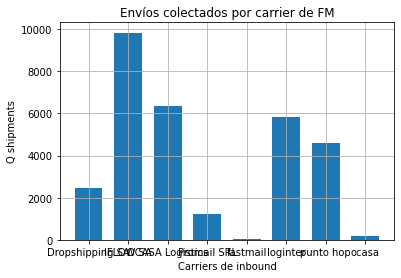

In [48]:
plt.bar(agg_shp_by_in_carrier['Inbound Carrier Name'],agg_shp_by_in_carrier['Shipment ID_count'],width=0.7,)
plt.grid()
plt.xlabel("Carriers de inbound")
plt.ylabel("Q shipments")
plt.title("Envíos colectados por carrier de FM")

In [49]:
df.columns

Index(['Shipment ID', 'Inbound ID', 'Truck ID', 'Outbound ID', 'Dispatch ID',
       'Date Created', 'NFE', 'Hub Status', 'Reject Reason',
       'Inbound Date Opened', 'Inbound Date Included', 'Inbound Date Closed',
       'Inbound Carrier Name', 'Inbound User ID', 'Inbound Dock ID',
       'Labeling Date Printed', 'Labeling Authorization Date',
       'Labeling Last Print User', 'Labeling Workstation ID', 'Weight',
       'Height', 'Length', 'Width', 'Labeling Carrier Name',
       'Labeling Service Id', 'Labeling Service Name', 'Labeling Zone',
       'Tracking Number', 'Outbound Date Opened', 'Outbound Included Date',
       'Outbound Date Closed', 'Outbound User IDs', 'Outbound Added By',
       'Outbound Position', 'Dispatch Included Date', 'Dispatch Date Finished',
       'Dispatch Truck ID', 'Dispatch User ID', 'Dispatch Dock ID', 'Priority',
       'Process Type', 'Seller ID', 'Buyer ID', 'Divergence', 'LastMile',
       'LastMile Reimpressão', 'InBuffer', 'InBuffer Name',
   

In [54]:
agg_shp_by_hu = df.groupby(['Labeling Carrier Name','Outbound ID']).agg({'Shipment ID' : 'count'})
agg_shp_by_hu = agg_shp_by_hu.reset_index()
agg_shp_by_hu

,Labeling Carrier Name,Outbound ID,Shipment ID
0,Andreani,22317391334366,164
1,Andreani,22317700334270,101
2,Andreani,22317744486813,13
3,Andreani,223166861979268,1
4,Andreani,223173728359439,17
...,...,...,...
983,Webpack,2231773930591027,38
984,Webpack,2231776973384690,1
985,Webpack,2231776998102813,1
986,Webpack,2231778597616931,4


In [61]:
agg_spp_by_carrier = agg_shp_by_hu.groupby(['Labeling Carrier Name']).agg({'Shipment ID' : 'mean'})
agg_spp_by_carrier = agg_spp_by_carrier.reset_index()
agg_spp_by_carrier.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Labeling Carrier Name  8 non-null      object 
 1   Shipment ID            8 non-null      float64
dtypes: float64(1), object(1)
memory usage: 256.0+ bytes


In [68]:
alt.Chart(agg_spp_by_carrier).mark_bar().encode(
    x = 'Labeling Carrier Name',
    y = 'Shipment ID'
).properties(width=500)

alt.Chart(...)

In [70]:
df.shape # Filas y columnas

(38946, 59)

In [71]:
df.size

2297814

In [72]:
agg_shp_by_hu.describe()

,Outbound ID,Shipment ID
count,988,988
mean,2030272212674693,39
std,607843536458731,54
min,2231770889514,1
25%,2231749305440746,7
50%,2231761172878629,14
75%,2231771300902428,42
max,2231789492002601,397


In [76]:
agg_spp_by_carrier = agg_spp_by_carrier.sort_values('Shipment ID', ascending = True)
agg_spp_by_carrier

,Labeling Carrier Name,Shipment ID
3,OCASA,34
0,Andreani,36
6,Urbano,38
7,Webpack,38
1,Correo Argentino,40
5,Reprocesos Carrito,49
2,OCA,52
4,Punto HOP,69


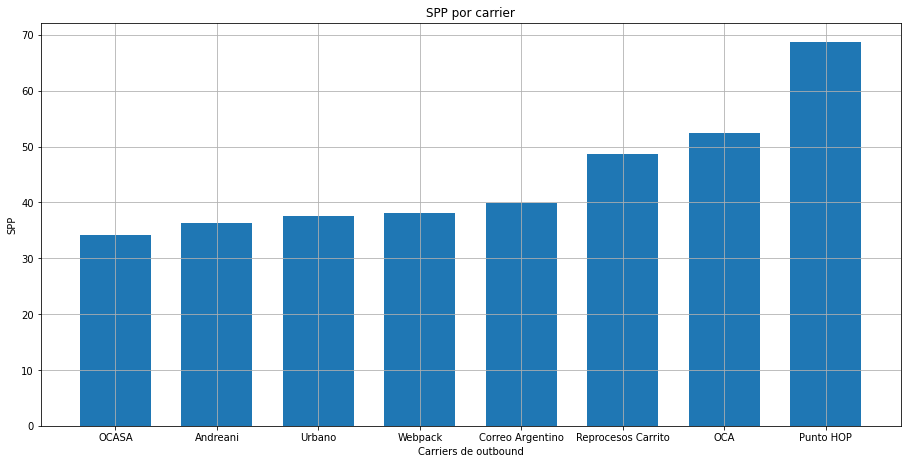

In [97]:
plt.bar(agg_spp_by_carrier['Labeling Carrier Name'],agg_spp_by_carrier['Shipment ID'],width=0.7,)
plt.grid()
plt.xlabel("Carriers de outbound")
plt.ylabel("SPP")
plt.title("SPP por carrier")
plt.subplots_adjust(left=0.01,
                    bottom=0.1, 
                    right=2, 
                    top=1.5, 
                    wspace=1, 
                    hspace=1)

In [98]:
df.columns

Index(['Shipment ID', 'Inbound ID', 'Truck ID', 'Outbound ID', 'Dispatch ID',
       'Date Created', 'NFE', 'Hub Status', 'Reject Reason',
       'Inbound Date Opened', 'Inbound Date Included', 'Inbound Date Closed',
       'Inbound Carrier Name', 'Inbound User ID', 'Inbound Dock ID',
       'Labeling Date Printed', 'Labeling Authorization Date',
       'Labeling Last Print User', 'Labeling Workstation ID', 'Weight',
       'Height', 'Length', 'Width', 'Labeling Carrier Name',
       'Labeling Service Id', 'Labeling Service Name', 'Labeling Zone',
       'Tracking Number', 'Outbound Date Opened', 'Outbound Included Date',
       'Outbound Date Closed', 'Outbound User IDs', 'Outbound Added By',
       'Outbound Position', 'Dispatch Included Date', 'Dispatch Date Finished',
       'Dispatch Truck ID', 'Dispatch User ID', 'Dispatch Dock ID', 'Priority',
       'Process Type', 'Seller ID', 'Buyer ID', 'Divergence', 'LastMile',
       'LastMile Reimpressão', 'InBuffer', 'InBuffer Name',
   

In [105]:
df_slice = df[['Shipment ID','Outbound ID','Dispatch ID','Inbound Date Included','Outbound Included Date','Dispatch Date Finished']]
df_slice

,Shipment ID,Outbound ID,Dispatch ID,Inbound Date Included,Outbound Included Date,Dispatch Date Finished
0,41172004555,2231751909309865,2231774370482667,2022-10-02 18:46:21+00:00,2022-10-02 19:18:01+00:00,2022-11-02 00:50:40+00:00
1,41171687207,2231760161503369,2231774370482667,2022-10-02 19:28:10+00:00,2022-10-02 20:51:12+00:00,2022-11-02 00:50:40+00:00
2,41172194371,2231760161503369,2231774370482667,2022-10-02 19:57:06+00:00,2022-10-02 20:45:41+00:00,2022-11-02 00:50:40+00:00
3,41171906821,2231751905856411,2231774370482667,2022-10-02 17:58:53+00:00,2022-10-02 20:12:33+00:00,2022-11-02 00:50:40+00:00
4,41172154927,2231765379297322,2231774370482667,2022-10-02 20:37:04+00:00,2022-10-02 22:54:17+00:00,2022-11-02 00:50:40+00:00
...,...,...,...,...,...,...
38941,41172130732,2231756461691522,2231787229063851,2022-10-02 17:30:03+00:00,2022-10-02 20:40:49+00:00,2022-11-02 02:46:28+00:00
38942,41171671408,22317703697676,2231787229063851,2022-10-02 20:20:42+00:00,2022-10-02 22:54:34+00:00,2022-11-02 02:46:28+00:00
38943,41172325071,2231756461691522,2231787229063851,2022-10-02 16:26:43+00:00,2022-10-02 20:58:13+00:00,2022-11-02 02:46:28+00:00
38944,41173082886,2231756461691522,2231787229063851,2022-10-02 14:57:05+00:00,2022-10-02 20:59:51+00:00,2022-11-02 02:46:28+00:00


In [120]:
slice_loginter_urb = df[(df['Inbound Carrier Name'] == 'loginter') & (df['Labeling Carrier Name'] == 'Urbano')].head()
slice_loginter_urb

,Shipment ID,Inbound ID,Truck ID,Outbound ID,Dispatch ID,Date Created,NFE,Hub Status,Reject Reason,Inbound Date Opened,Inbound Date Included,Inbound Date Closed,Inbound Carrier Name,Inbound User ID,Inbound Dock ID,Labeling Date Printed,Labeling Authorization Date,Labeling Last Print User,Labeling Workstation ID,Weight,Height,Length,Width,Labeling Carrier Name,Labeling Service Id,Labeling Service Name,Labeling Zone,Tracking Number,Outbound Date Opened,Outbound Included Date,Outbound Date Closed,Outbound User IDs,Outbound Added By,Outbound Position,Dispatch Included Date,Dispatch Date Finished,Dispatch Truck ID,Dispatch User ID,Dispatch Dock ID,Priority,Process Type,Seller ID,Buyer ID,Divergence,LastMile,LastMile Reimpressão,InBuffer,InBuffer Name,InBuffer Promise EDT,InBuffer Promise Shipping,Arrived LastMile,Arrived Npym,Was Reauthorized,Cutoff,Start Priorization,End Priorization,Arrival Logistic Type,Arrival Tracking Number,Status Description
113,41172997587,a53d3c42-0e01-4d12-bbd1-31bab68b761b,ae431ge,2231763539821998,2231778838105348,10/02/2022 09:22:34,NaN,dispatched,NaN,10/02/2022 18:16:58,2022-10-02 18:24:55+00:00,10/02/2022 18:31:27,loginter,ME.AR.LAVARI(97762),4019,NaN,10/02/2022 18:24:58,NaN,0,20000,30,50,30,Urbano,144772,Prioritario,urb165,DVPQ01010000000027565405,10/02/2022 21:23:36,2022-10-02 21:29:23+00:00,10/02/2022 21:47:35,"[ME.AR.ABREZ(203531), ME.AR.ABREZ(203531)]",ME.AR.ABREZ(203531),XMC9,11/02/2022 00:52:42,2022-11-02 00:52:41+00:00,DSI 800,ME.AR.ANMALDONADO(111858),25318,True,NPyM,83417473,471427068,False,True,False,False,none,0,NaN,True,True,False,01:00,10/02/2022 17:00:00,11/02/2022 01:00:00,cross_docking,NaN,shipped
118,41171947903,3062769d-1ef6-45b1-bee8-1504257d7a44,lxo126,2231734662132933,2231778838105348,10/02/2022 03:41:04,NaN,dispatched,NaN,10/02/2022 19:47:27,2022-10-02 19:48:23+00:00,10/02/2022 20:33:53,loginter,ME.AR.DAALMADA552(125526),4014,NaN,10/02/2022 19:48:24,NaN,0,4450,30,65,44,Urbano,144772,Prioritario,urb165,DVPQ01010000000027550449,10/02/2022 15:28:56,2022-10-02 20:38:22+00:00,10/02/2022 20:46:36,"[ME.AR.WAGOMEZ3(209539), ME.AR.FAVELDANO(20878...",ME.AR.FAVELDANO(208780),XMC19,11/02/2022 00:52:43,2022-11-02 00:52:41+00:00,DSI 800,ME.AR.ANMALDONADO(111858),25318,True,NPyM,78005094,460532440,False,True,False,False,none,0,NaN,True,True,False,01:00,10/02/2022 17:00:00,11/02/2022 01:00:00,cross_docking,NaN,shipped
122,41172117075,66759a5f-c7f4-4a43-9efe-2cbdfee0019e,myg824,2231757914087208,2231778838105348,10/02/2022 08:20:24,NaN,dispatched,NaN,10/02/2022 19:02:37,2022-10-02 19:22:47+00:00,10/02/2022 19:39:34,loginter,ME.AR.GAARIAS(217911),4022,NaN,10/02/2022 19:22:48,NaN,0,400,6,41,19,Urbano,144772,Prioritario,urb165,DVPQ01010000000027553320,10/02/2022 20:14:30,2022-10-02 20:26:50+00:00,10/02/2022 21:19:56,"[ME.AR.LNDIAZ(208358), ME.AR.LNDIAZ(208358)]",ME.AR.LNDIAZ(208358),PMA18,11/02/2022 00:52:44,2022-11-02 00:52:41+00:00,DSI 800,ME.AR.ANMALDONADO(111858),25318,True,NPyM,39472066,149163760,False,True,False,False,none,0,NaN,True,True,False,01:00,10/02/2022 17:00:00,11/02/2022 01:00:00,cross_docking,NaN,shipped
131,41172920915,77842df4-499e-4ed4-949c-700399c0a210,ac669ln,2231757914087208,2231778838105348,10/02/2022 13:01:56,NaN,dispatched,NaN,10/02/2022 19:37:43,2022-10-02 20:00:37+00:00,10/02/2022 20:02:50,loginter,ME.AR.JGARCIA(220264),4005,NaN,10/02/2022 20:00:37,NaN,0,300,5,44,33,Urbano,144772,Prioritario,urb165,DVPQ01010000000027572238,10/02/2022 20:14:30,2022-10-02 20:45:55+00:00,10/02/2022 21:19:56,"[ME.AR.LNDIAZ(208358), ME.AR.LNDIAZ(208358)]",ME.AR.LNDIAZ(208358),PMA18,11/02/2022 00:52:44,2022-11-02 00:52:41+00:00,DSI 800,ME.AR.ANMALDONADO(111858),25318,True,NPyM,89575112,736947117,False,True,False,False,none,0,NaN,True,True,False,01:00,10/02/2022 17:00:00,11/02/2022 01:00:00,cross_docking,NaN,shipped
138,41173389097,04cff9ed-ac87-4352-98df-7349aef4dc5f,ae431ge,2231760817642946,2231778838105348,10/02/2022 12:12:55,NaN,dispatched,NaN,10/02/2022 15:41:34,2022-10-02 15:56:35+00:00,1

In [124]:
df['Labeling Carrier Name'].value_counts(sort=True)

OCASA                 9561
Reprocesos Carrito    8760
Andreani              7967
Urbano                6631
Webpack               2066
Correo Argentino      1846
OCA                   1477
Punto HOP              550
Name: Labeling Carrier Name, dtype: int64

In [127]:
agg_shp_by_hu.to_csv('agg_shp_by_hu.csv', index=False)